# **HW2 for Nonlinear Control Systems** 

> Instructor: Dr. Le Yi Wang  
> **Solutions given by Yuqi Wang**   
> Email: he1173@wayne.edu
> Date: 10.04.2021

## Descriptions
- Source codes are and will be uploaded and updated to [Github repo](https://github.com/BoomAmplifier/NLS-HW.git).  
- *Jupyter Notebook* and *python3* are used in the solutions.

## Solutions   
#### Problem 1: 
A second-order nonlinear system is given in state space form    
$$ 
\begin{equation}
    \tag{1-1}
    \left\{
        \begin{array}{}
            \dot{x}_1=x_2 \\
             \dot{x}_2=x_1(x_1-1)-x_2
        \end{array}
    \right.
\end{equation}
$$    
Determine the equilibrium points and their stability by local linearization.


**Solution:**  
According to equation(1-1),  
$$
\begin{equation}
\tag{1-2}
\left\{
        \begin{array}{}
            x_2=0 \\
            x_1(x_1-1)-x_2=0
        \end{array}
    \right.
\end{equation}$$   
Obviously, the equilibrium points are $(x_1,x_2)=[(0,0);(1,0)]$. 

Calculate the Jacobi matrix:     
$$
\begin{equation}
\tag{1-3}
J=
\begin{bmatrix}{}
\frac{\partial{f_1}}{x_1} & \frac{\partial{f_1}}{x_2} \\
\frac{\partial{f_2}}{x_1} & \frac{\partial{f_2}}{x_2} 
\end{bmatrix}
{=}
\begin{bmatrix}{}
0 & 1 \\
2x_1-1 & -1
\end{bmatrix}
\end{equation}$$


Linearizing equation(1-1) at the equilibrium points:
1) $(x_1,x_2)=(0,0)$   
$$
\begin{equation}
\tag{1-4}
    \begin{bmatrix}
        \Delta{\dot{x_1}} \\
        \Delta{\dot{x_2}}
    \end{bmatrix}
    {=}
    J_{\mid{x_1 = 0,x_2 = 0}}
    \begin{bmatrix}
        x_1-0 \\
        x_2-0
    \end{bmatrix}
    {=}
    \begin{bmatrix}
        0  &   1 \\
        -1 &  -1 
    \end{bmatrix}
    \begin{bmatrix}
        x_1 \\
        x_2
    \end{bmatrix}
\end{equation}
$$

Using Python3 to calculate the nominal point of J.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%
J=np.array([[0 , 1],
            [-1,-1]
           ])
w,v = np.linalg.eig(J)
print('eigvalue:',w)
print('eigvector:',v)

eigvalue: [-0.5+0.8660254j -0.5-0.8660254j]
eigvector: [[ 0.70710678+0.j          0.70710678-0.j        ]
 [-0.35355339+0.61237244j -0.35355339-0.61237244j]]


The eigenvalues are $-0.5\pm{0.8660254j}$, hence the system is stable at (0,0).

2) $(x_1,x_2)=(1,0)$   
$$
\begin{equation}
\tag{1-4}
    \begin{array}{}
    \begin{bmatrix}
        \Delta{\dot{x_1}} \\
        \Delta{\dot{x_2}}
    \end{bmatrix}
    & = 
    J_{\mid{x_1 = 1,x_2 = 0}}
    \begin{bmatrix}
        x_1-1 \\
        x_2-0
    \end{bmatrix} \\
    &= 
    \begin{bmatrix}
        0  &   1 \\
        1 &  -1 
    \end{bmatrix}
    \begin{bmatrix}
        x_1-1 \\
        x_2
    \end{bmatrix} \\
    &= 
    \begin{bmatrix}
        0  &   1 \\
        1 &  -1 
    \end{bmatrix}
    \begin{bmatrix}
        x_1\\
        x_2
    \end{bmatrix}
    {+}
     \begin{bmatrix}
        0\\
       -1
    \end{bmatrix}
    \end{array}
\end{equation}
$$

Calculate eigenvalues:

In [21]:
J=np.array([[0 , 1],
            [1,-1]
           ])
w,v = np.linalg.eig(J)
print('eigvalue:',w)
print('eigvector:',v)

eigvalue: [ 0.61803399 -1.61803399]
eigvector: [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


The eigenvalues have a positive real part. The system is unstable.

#### Problem 2: 
For the system $\dot{x}=x^2+\alpha x$, depending on the parameter $\alpha$, determine the equilibrium points, and evaluate their staility for the cases $\alpha >0, \alpha =0, \alpha <0$.

**Solution:**
Equilibrium points: $ x=0,x=-\alpha$.   
Linearize the system:
$$ A=\frac{\text{d}(x^2+\alpha x)}{\text{d}x}=2x+\alpha $$

$$
\begin{equation}
\left\{
    \begin{array}{}
        A_{\mid{x=0}}=\alpha \\
        A_{\mid{x=-\alpha}}=-\alpha
    \end{array}
\right.
\end{equation}
$$
$$
\begin{equation}
\left\{
    \begin{array}{}
        \frac{\text{d}(x-0)}{\text{d}t}=A_{\mid{x=0}}(x-0) 
        \Rightarrow 
        \Delta{\dot{x}} = \alpha \Delta x \\
        \frac{\text{d}(x+\alpha)}{\text{d}t}=A_{\mid{x=-\alpha}}(x+\alpha) 
        \Rightarrow 
        \Delta{\dot{x}} = -\alpha \Delta x
    \end{array}
\right.
\end{equation}
$$

Hence,   
$\alpha >0$, the system is unstable at $x=0$ while stable at $x=-\alpha$.   
$\alpha =0$, the system is inconclusive.    
$\alpha <0$, the system is at $x=0$ while unstable at $x=-\alpha$.

#### Problem 3: 
Draw the phase portrait and discuss the properties of the linear, unity feedback control system of open-loop transfer function   
$$ G(p)=\frac{10}{p(1+0.1p)} $$

**Solution:**
The system can be implied as:  
$$
\begin{equation}
\tag{3-1}
    \left\{
        \begin{array}{}
            e=r-y  \\
            y=G(p)e\Rightarrow (0.1p^2+p)y=10e 
        \end{array}
    \right.
\end{equation}$$

$$
\begin{equation}
\tag{3-2}
\Rightarrow
    \left\{
    \begin{array}{}
        y=\frac{100}{p^2+10p+100}r \\
        \ddot{y}+10\dot{y}+100y=100r
    \end{array}
    \right.
\end{equation}$$
let $p^2+10p+100=0$, we have
$$
\begin{equation}
\tag{3-3}
    \begin{array}{}
        p &= \frac{-10\pm \sqrt{-300}}{2} \\
          &=-5 \pm j10 \sqrt{3}
    \end{array}
\end{equation}$$
let $x_1=y,x_2=\dot{y},r=r(t)=0$, we have     
$$
\begin{equation}
\tag{3-4}
    \left\{
        \begin{array}{}
            \dot{x_1} = x_2  \\
            \dot{x_2} = -10x_2-100x_1
        \end{array}
    \right.
\end{equation}$$  

Obviously, the singular point is (0,0).
Refer to case 4 in lecture 2, the Jordan form matrix is 
$$
\begin{equation}
\tag{3-5}
    J=
    \begin{bmatrix}{}
          -5          &  -10\sqrt{3} \\
          10\sqrt{3}  &  -5
    \end{bmatrix}
\end{equation}$$
$$
\begin{equation}
\tag{3-6}
    \left\{
        \begin{array}{}
            \dot{z_1} = -5z_1-10\sqrt{3}z_2  \\
            \dot{z_2} = 10\sqrt{3}z_1-5z_2
        \end{array}
    \right.
\end{equation}$$  

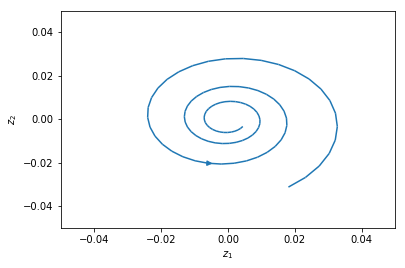

In [128]:
import pylab as plb
x1values, x2values = plb.meshgrid(np.linspace(-1, 1, 4), \
                                  np.linspace(-1, 1, 4), \
                                  sparse=True)
x1dot = -5*x1values-10*3*np.sqrt(3)*x2values
x2dot = 10*3*np.sqrt(3)*x1values-5*x2values
plb.streamplot(x1values, x2values, x1dot, x2dot)
plb.xlabel('$z_1$')
plb.ylabel('$z_2$')
plb.ylim(-0.05,0.05)
plb.xlim(-0.05,0.05)
plb.show()

The system is stable focus at (0,0).

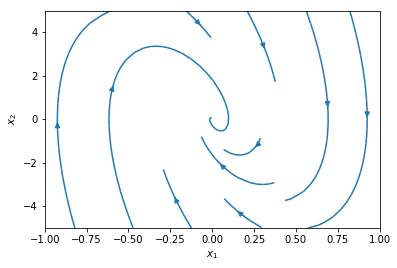

In [327]:
x1values, x2values = plb.meshgrid(np.linspace(-5, 5, 100), \
                                  np.linspace(-5, 5, 100))
x1dot = x2values
x2dot = -10*x2values-100*x1values
plb.streamplot(x1values, x2values, x1dot, x2dot)
plb.xlabel('$x_1$')
plb.ylabel('$x_2$')
plb.ylim(-5,5)
plb.xlim(-1,1)
plb.show()

#### Problem4:   
Draw the phase portraits of the following systems, using isoclines.

**Solution:**
let $x_1=\theta, x_2=\dot{\theta}$,thus  
$$
\begin{equation}
\tag{4-1}
\dot{x}_1= x_2
\end{equation}$$

$a$) $\ddot{\theta}+\dot{\theta}+0.5\theta=0$        
$$
\begin{equation}
\tag{4-2}
    \dot{x_2}=-x_2-0.5x_1
\end{equation}$$

$$
\begin{equation}
\tag{4-2}
    \frac{\text{d}x_2}{\text{d}x_1} = \frac{-x_2-0.5x_1}{x_2}=\alpha
\end{equation}$$

$$
\begin{equation}
\tag{4-3}
    x_2=\frac{-1}{2\alpha+2}x_1
\end{equation}$$

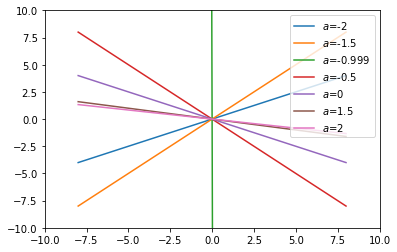

In [218]:
def f(X,a):
    return -X/(2*a+2)
x = np.linspace(-8.0, 8.0, 20)
for ai in [-2, -1.5, -0.999,-0.5, 0, 1.5 ,2]:
    s_label = "$a$="+str(ai)
    plb.plot(x,f(x,ai),label=s_label)
    plb.legend()
plb.ylim(-10,10)
plb.xlim(-10,10)
plb.show()

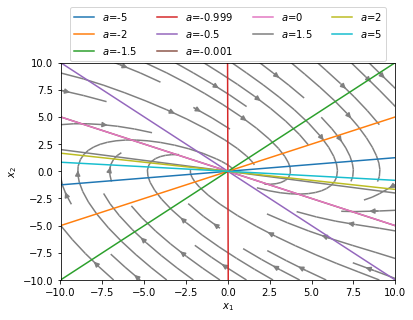

In [258]:
def f(X,a):
    return -X/(2*a+2)
x = np.linspace(-10.0, 10.0, 20)
for ai in [-5,-2, -1.5,-0.999, -0.5, -0.001, 0, 1.5 ,2, 5]:
    s_label = "$a$="+str(ai)
    plb.plot(x,f(x,ai),label=s_label)
    
x1values, x2values = plb.meshgrid(np.linspace(-10, 10, 10), \
                                  np.linspace(-10, 10, 10))
x1dot = x2values
x2dot = -x2values-0.5*x1values
plb.streamplot(x1values, x2values, x1dot, x2dot, \
               color='grey', density=0.5)
plb.xlabel('$x_1$')
plb.ylabel('$x_2$')
plb.ylim(-10,10)
plb.xlim(-10,10)
plb.legend(loc='upper center',\
           bbox_to_anchor=(0.5, 1.28),ncol=4)
plb.show()

$b$) $\ddot{\theta}+\dot{\theta}+0.5\theta=1$        
$$
\begin{equation}
\tag{4-4}
    \dot{x_2}=-x_2-0.5x_1+1
\end{equation}$$

$$
\begin{equation}
\tag{4-5}
    \frac{\text{d}x_2}{\text{d}x_1} = \frac{-x_2-0.5x_1+1}{x_2}=\alpha
\end{equation}$$

$$
\begin{equation}
\tag{4-6}
    x_2=\frac{-1}{2\alpha+2}x_1+\frac{1}{\alpha+1}
\end{equation}$$

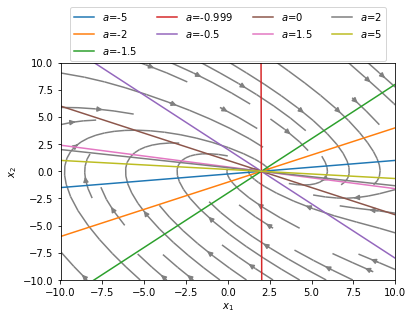

In [260]:
def f(X,a):
    return -X/(2*a+2)+1/(a+1)
x = np.linspace(-10.0, 10.0, 20)
for ai in [-5,-2, -1.5, -0.999, -0.5, 0, 1.5 ,2, 5]:
    s_label = "$a$="+str(ai)
    plb.plot(x,f(x,ai),label=s_label)
    
x1values, x2values = plb.meshgrid(np.linspace(-10, 10, 10), \
                                  np.linspace(-10, 10, 10))
x1dot = x2values
x2dot = -x2values-0.5*x1values+1
plb.streamplot(x1values, x2values, x1dot, x2dot, \
               color='grey', density=0.5)
plb.xlabel('$x_1$')
plb.ylabel('$x_2$')
plb.ylim(-10,10)
plb.xlim(-10,10)
plb.legend(loc='upper center',\
           bbox_to_anchor=(0.5, 1.28),ncol=4)
plb.show()

$c$) $\ddot{\theta}+\dot{\theta}^2+0.5\theta=0$        
$$
\begin{equation}
\tag{4-4}
    \dot{x_2}=-x_2^2-0.5x_1
\end{equation}$$

$$
\begin{equation}
\tag{4-5}
    \frac{\text{d}x_2}{\text{d}x_1} = \frac{-x_2^2-0.5x_1}{x_2}=\alpha
\end{equation}$$

$$
\begin{equation}
    x_2^2+\alpha x_2=-0.5x_1
\end{equation}$$

$$
\begin{equation}
    (x_2+\frac{\alpha}{2})^2=-0.5x_1+\frac{\alpha^2}{4}
\end{equation}$$

$$
\begin{equation}
\tag{4-6}
    x_2=-\frac{\alpha}{2} \pm \sqrt{-0.5x_1+\frac{\alpha^2}{4}}
\end{equation}$$

According to equation(4-6),   
$$ x_1 \le \frac{\alpha ^2}{2}$$

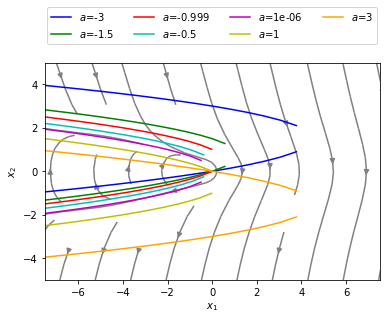

In [16]:
def f(X,a):
    return [-a/2+np.sqrt(-0.5*X+a*a/4),\
            -a/2-np.sqrt(-0.5*X+a*a/4)]
colorlist = ['b','g','r','c','m','y','orange','teal','navy','purple']
color_n=0
for ai in [-3, -1.5, -0.999, -0.5, 0.000001, 1, 3]:
    s_label = "$a$="+str(ai)
    xmax=ai*ai/2
    x = np.linspace(-10.0, xmax, 20, endpoint=False)
    color_set=colorlist[color_n]
    color_n=color_n+1
    if color_n>len(colorlist):
        color_n=0
    plb.plot(x,f(x,ai)[1],color=color_set)
    plb.plot(x,f(x,ai)[0],color=color_set,label=s_label)
x1values, x2values = plb.meshgrid(np.linspace(-10, 10, 10), \
                                  np.linspace(-5, 5, 10))
x1dot = x2values
x2dot = -np.square(x2values)-0.5*x1values
plb.streamplot(x1values, x2values, x1dot, x2dot, \
               color='grey', density=0.5)
plb.xlabel('$x_1$')
plb.ylabel('$x_2$')
plb.ylim(-5,5)
plb.xlim(-7.5,7.5)
plb.legend(loc='upper center',\
           bbox_to_anchor=(0.5, 1.28),ncol=4)
plb.show()

#### Problem5:   
Consider the nonlinear system   
$$ \dot{x}=y+x(x^2+y^2-1) \sin{\frac{1}{x^2+y^2-1}} $$
$$ \dot{y}=-x+y(x^2+y^2-1) \sin{\frac{1}{x^2+y^2-1}} $$  
Without solving the above equations explicitly, show that the system has infinite number of limit cycles. Determine the stability of these limit cycles. (Hint: Use polar coordinates.)    

**Solution:**   
Change to the polar coordinates, let   
$$ x=r\cos{\theta}, y=r\sin{\theta}$$
Calculate $\dot{r}$
$$ 
\begin{equation}
\tag{5-1}
    \begin{array}{}
        r^2 &=& x^2+y^2 \\
        2r\dot{r} &=& 2x\dot{x} + 2y\dot{y} \\
        r\dot{r} &=& x\left[ y+x(x^2+y^2-1) \sin{\frac{1}{x^2+y^2-1}}\right] \\
        & &+ y\left[ -x+y(x^2+y^2-1) \sin{\frac{1}{x^2+y^2-1}}\right]\\
        \dot{r} &=& r(r^2-1)\sin{\frac{1}{r^2-1}} 
    \end{array}
\end{equation}$$
Calculate $\dot{\theta}$
$$ \theta=\tan^{-1}{\frac{y}{x}}$$
$$ 
\begin{equation}
\tag{5-2}
    \begin{array}{}
        \dot{\theta} &=& \frac{1}{1+(\frac{y}{x})^2} \frac{\text{d}}{\text{d}t} \left( \frac{y}{x} \right)\\
        &=& \frac{x^2}{x^2+y^2} \frac{x \dot{y}-y \dot{x}}{x^2} \\
        &=& \frac{x\dot{y}-y\dot{x}}{r^2} \\
        &=& \frac{x\left[ -x+y(x^2+y^2-1) \sin{\frac{1}{x^2+y^2-1}}\right] - y\left[ y+x(x^2+y^2-1) \sin{\frac{1}{x^2+y^2-1}}\right]}{r^2} \\
        &=& -1
     \end{array} 
\end{equation}$$

According to equation(5-1), due to 
$$ \lim_{r\to\infty,r\neq \pm 1} \sin{\frac{1}{r^2-1}} = 0 $$ 
$$ \lim_{r\to \pm 1} \sin{\frac{1}{r^2-1}} = 1 $$ 
Thus, $r=0,r=1$ and $r=\pm \sqrt{1-\frac{1}{k\pi}(n=1,2...k=n)}$ are limit cycles.
The Jordan form matrix of the system will be 
$$
\begin{equation}
\tag{5-3}
    J=
    \begin{bmatrix}
        0  & 1 \\
        -1 & 0
    \end{bmatrix}
\end{equation}$$
Caculate the eigenvalues:  

In [347]:
J=np.array([[0 , 1],
            [-1,0]
           ])
w,v = np.linalg.eig(J)
print('eigvalue:',w)
print('eigvector:',v)

eigvalue: [0.+1.j 0.-1.j]
eigvector: [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]


The system is center at (0,0).

In [349]:
# def fr(R):
#     r_sqr= np.square(R)
#     return R*(r_sqr-1)*np.sin(1/(r_sqr-1))
# r = np.linspace(0,1,100,endpoint=False)
# plt.plot(r,fr(r))
# r = np.linspace(2,1,100,endpoint=False)
# plt.plot(r,fr(r))
# r = np.linspace(0,-1,100,endpoint=False)
# plt.plot(r,fr(r))
# r = np.linspace(-2,-1,100,endpoint=False)
# plt.plot(r,fr(r))
# plt.show()

# def fR(R):
#     r_sqr= np.square(R)
#     return R*(r_sqr-1)*np.sin(1/(r_sqr-1))

#### Problem 6:    
The system shown in Figure 2.10 represents a satellite control system with rate feedback provided by a gyroscope. Draw the phase portrait of the system and determine the system's stability.

**Solution:**  
According to Figure 2.10, 
$$ \ddot{\theta} =u $$
let   
$$r = -\dot{\theta} + \alpha \theta $$   
$$
\begin{equation}
    u {=} \left\{ 
    \begin{array}{}
       -\dot{\theta}-\alpha \theta &(r>0)\\
       0 &(r=0)\\
       \dot{\theta}+\alpha \theta &(r<0)
     \end{array}
     \right.
\end{equation}$$
           
            
            

if $x_1=\theta, x_2=\dot{\theta}$   
$$
\begin{equation}
\left\{
    \begin{array}{}
        \dot{x_1}=x_2\\
        \dot{x_2}=u
    \end{array}
\right.
\end{equation}
$$
For $r>0$
$$
\begin{equation}
\left\{
    \begin{array}{}
        \dot{x_1}=x_2\\
        \dot{x_2}=-x_2-\alpha x_1
    \end{array}
\right.
\end{equation}
$$

$$
\begin{equation}
 \begin{array}{}
  \frac{\text{d}x_2}{\text{d}x_1} = \frac{-x_2-\alpha x_1}{x_2} \\
  x_2^2 +2x_1x_2+\alpha x_1^2 =C_1
  \end{array}
\end{equation}$$
let $\alpha=1$
$$(x_2+x_1)^2=C_1$$

For $r<0$
$$
\begin{equation}
\left\{
    \begin{array}{}
        \dot{x_1}=x_2\\
        \dot{x_2}=x_2+\alpha x_1
    \end{array}
\right.
\end{equation}
$$

$$
\begin{equation}
 \begin{array}{}
  \frac{\text{d}x_2}{\text{d}x_1} = \frac{x_2+\alpha x_1}{x_2} \\
  x_2^2 -2x_1x_2-\alpha x_1^2 =C_2
  \end{array}
\end{equation}$$
let $\alpha=1$
$$(x_2-x_1)^2=C_2$$

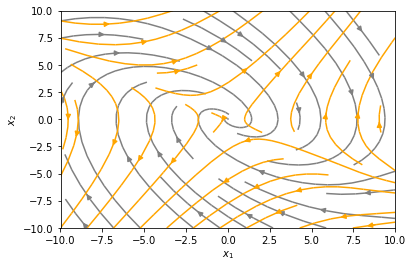

In [357]:
# def f(X,a):
#     return [-X-a
# x = np.linspace(-10.0, 10.0, 20)
# for ai in [-5,-2, -1.5, -0.999, -0.5, 0, 1.5 ,2, 5]:
#     s_label = "$a$="+str(ai)
#     plb.plot(x,f(x,ai),label=s_label)
    
x1values, x2values = plb.meshgrid(np.linspace(-10, 10, 10), \
                                  np.linspace(-10, 10, 10))
x1dot = x2values
x2dot = -x2values-x1values
plb.streamplot(x1values, x2values, x1dot, x2dot, \
               color='grey', density=0.5)
x3dot = x2values
x4dot = x2values+x1values
plb.streamplot(x1values, x2values, x3dot, x4dot, \
               color='orange', density=0.5)
plb.xlabel('$x_1$')
plb.ylabel('$x_2$')
plb.ylim(-10,10)
plb.xlim(-10,10)
# plb.legend(loc='upper center',\
#            bbox_to_anchor=(0.5, 1.28),ncol=4)
plb.show()